<a href="https://colab.research.google.com/github/andresalerno/datacamp_python/blob/main/data_manipulation_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 1

## 1.1) Setting up



In [3]:
!pip install PyDrive

In [4]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
downloaded = drive.CreateFile({'id':"1-Cd70bB4NKbeiLj_QzJ_l5sqWhbuoYN-"})   # replace the id with id of file you want to access
downloaded.GetContentFile('homelessness.csv')        # replace the file name with your file


In [7]:
import pandas as pd
homelessness = pd.read_csv('homelessness.csv')

In [8]:
homelessness.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570.0,864.0,4887681
1,1,Pacific,Alaska,1434.0,582.0,735139
2,2,Mountain,Arizona,7259.0,2606.0,7158024
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588


# Chapter 1

In [9]:
# Print the column index of homelessness
print(homelessness.columns)

Index(['Unnamed: 0', 'region', 'state', 'individuals', 'family_members',
       'state_pop'],
      dtype='object')


In [10]:
# Print the row index of homelessness
print(homelessness.index)

RangeIndex(start=0, stop=51, step=1)


In [11]:
print(homelessness.shape)

(51, 6)


In [12]:
# Select the individuals column
individuals = homelessness["individuals"]

# Print the head of the result
print(individuals.head())

0      2570.0
1      1434.0
2      7259.0
3      2280.0
4    109008.0
Name: individuals, dtype: float64


In [13]:
# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness["individuals"] > 10000]

# See the result
print(ind_gt_10k)

    Unnamed: 0              region  ... family_members  state_pop
4            4             Pacific  ...        20964.0   39461588
9            9      South Atlantic  ...         9587.0   21244317
32          32        Mid-Atlantic  ...        52070.0   19530351
37          37             Pacific  ...         3337.0    4181886
43          43  West South Central  ...         6111.0   28628666
47          47             Pacific  ...         5880.0    7523869

[6 rows x 6 columns]


In [14]:
# Add total col as sum of individuals and family_members
homelessness['total'] = homelessness['individuals'] + homelessness['family_members']

# Add p_individuals col as proportion of individuals
homelessness['p_individuals'] = homelessness['individuals'] / homelessness['total']

# See the result
print(homelessness)


    Unnamed: 0              region  ...     total  p_individuals
0            0  East South Central  ...    3434.0       0.748398
1            1             Pacific  ...    2016.0       0.711310
2            2            Mountain  ...    9865.0       0.735834
3            3  West South Central  ...    2712.0       0.840708
4            4             Pacific  ...  129972.0       0.838704
5            5            Mountain  ...   10857.0       0.700654
6            6         New England  ...    3976.0       0.573441
7            7      South Atlantic  ...    1082.0       0.654344
8            8      South Atlantic  ...    6904.0       0.546060
9            9      South Atlantic  ...   31030.0       0.691041
10          10      South Atlantic  ...    9499.0       0.730919
11          11             Pacific  ...    6530.0       0.632619
12          12            Mountain  ...    2012.0       0.644632
13          13  East North Central  ...   10643.0       0.634408
14          14  East Nort

# Chapter 2

In [15]:
downloaded = drive.CreateFile({'id':"1-Yb4vLGr1JIpGfxCf0snrWnXfi9D4YA8"})   # replace the id with id of file you want to access
downloaded.GetContentFile('sales.csv')        # replace the file name with your file

In [16]:
import pandas as pd
sales = pd.read_csv('sales.csv')

In [17]:
# Print the head of the sales DataFrame
print(sales.head())

# Print the info about the sales DataFrame
print(sales.info())

# Print the mean of weekly_sales
print(sales["weekly_sales"].mean())

# Print the median of weekly_sales
print(sales["weekly_sales"].median())


   Unnamed: 0  store type  ...  temperature_c fuel_price_usd_per_l  unemployment
0           0      1    A  ...       5.727778             0.679451         8.106
1           1      1    A  ...       8.055556             0.693452         8.106
2           2      1    A  ...      16.816667             0.718284         7.808
3           3      1    A  ...      22.527778             0.748928         7.808
4           4      1    A  ...      27.050000             0.714586         7.808

[5 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10774 non-null  int64  
 1   store                 10774 non-null  int64  
 2   type                  10774 non-null  object 
 3   department            10774 non-null  int64  
 4   date                  10774 non-null  object 
 5   weekly_sales        

In [18]:
# Print the maximum of the date column
print(sales["date"].max())

# Print the minimum of the date column
print(sales["date"].min())

2012-10-26
2010-02-05


In [19]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
# Print IQR of the temperature_c column
print(sales["temperature_c"].agg(iqr))

16.58333333333334


In [20]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg(iqr))

temperature_c           16.583333
fuel_price_usd_per_l     0.073176
unemployment             0.565000
dtype: float64


In [21]:
# Import NumPy and create custom IQR function
import numpy as np
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median]))

        temperature_c  fuel_price_usd_per_l  unemployment
iqr         16.583333              0.073176         0.565
median      16.966667              0.743381         8.099


In [22]:
# Sort sales_1_1 by date
sales_1_1 = sales.sort_values("date")

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1["cum_weekly_sales"] = sales_1_1["weekly_sales"].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1["cum_max_sales"] = sales_1_1["weekly_sales"].cummax()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

             date  weekly_sales  cum_weekly_sales  cum_max_sales
0      2010-02-05      24924.50      2.492450e+04       24924.50
6437   2010-02-05      38597.52      6.352202e+04       38597.52
1249   2010-02-05       3840.21      6.736223e+04       38597.52
6449   2010-02-05      17590.59      8.495282e+04       38597.52
6461   2010-02-05       4929.87      8.988269e+04       38597.52
...           ...           ...               ...            ...
3592   2012-10-05        440.00      2.568932e+08      293966.05
8108   2012-10-05        660.00      2.568938e+08      293966.05
10773  2012-10-05        915.00      2.568947e+08      293966.05
6257   2012-10-12          3.00      2.568947e+08      293966.05
3384   2012-10-26        -21.63      2.568947e+08      293966.05

[10774 rows x 4 columns]


In [23]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store", "type"])
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store", "department"])
print(store_depts.head())

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales["is_holiday"]].drop_duplicates(subset="date")

# Print date col of holiday_dates
print(holiday_dates)

      Unnamed: 0  store type  ...  temperature_c fuel_price_usd_per_l  unemployment
0              0      1    A  ...       5.727778             0.679451         8.106
901          901      2    A  ...       4.550000             0.679451         8.324
1798        1798      4    A  ...       6.533333             0.686319         8.623
2699        2699      6    A  ...       4.683333             0.679451         7.259
3593        3593     10    B  ...      12.411111             0.782478         9.765

[5 rows x 10 columns]
    Unnamed: 0  store type  ...  temperature_c fuel_price_usd_per_l  unemployment
0            0      1    A  ...       5.727778             0.679451         8.106
12          12      1    A  ...       5.727778             0.679451         8.106
24          24      1    A  ...       5.727778             0.679451         8.106
36          36      1    A  ...       5.727778             0.679451         8.106
48          48      1    A  ...       5.727778             0.67

In [24]:
# Count the number of stores of each type
store_counts = store_types["type"].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props = store_types["type"].value_counts(normalize=True)
print(store_props)

# Count the number of each department number and sort
dept_counts_sorted = store_depts["department"].value_counts(sort=True)
print(dept_counts_sorted)

# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts["department"].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

A    11
B     1
Name: type, dtype: int64
A    0.916667
B    0.083333
Name: type, dtype: float64
41    12
30    12
23    12
24    12
25    12
      ..
37    10
48     8
50     6
39     4
43     2
Name: department, Length: 80, dtype: int64
41    0.012917
30    0.012917
23    0.012917
24    0.012917
25    0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: department, Length: 80, dtype: float64


In [25]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


In [26]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales_by_type)
print(sales_propn_by_type)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64


In [27]:
# From previous step
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(["type", "is_holiday"])["weekly_sales"].sum()
print(sales_by_type_is_holiday)

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


In [28]:
# Import numpy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby("type")["weekly_sales"].agg([min, max, np.mean, np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby("type")[["unemployment", "fuel_price_usd_per_l"]].agg([min, max, np.mean, np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

         min        max          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08
     unemployment                   ... fuel_price_usd_per_l                    
              min    max      mean  ...                  max      mean    median
type                                ...                                         
A           3.879  8.992  7.972611  ...             1.107410  0.744619  0.735455
B           7.170  9.765  9.279323  ...             1.107674  0.805858  0.803348

[2 rows x 8 columns]


In [29]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values="weekly_sales", index="type")

# Print mean_sales_by_type
print(mean_sales_by_type)

      weekly_sales
type              
A     23674.667242
B     25696.678370


In [30]:
# Import NumPy as np
import numpy as np

# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values="weekly_sales", index="type", aggfunc=[np.mean, np.median])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

              mean       median
      weekly_sales weekly_sales
type                           
A     23674.667242     11943.92
B     25696.678370     13336.08


In [31]:
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values="weekly_sales", index="type", columns="is_holiday")

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

is_holiday         False      True 
type                               
A           23768.583523  590.04525
B           25751.980533  810.70500


In [32]:
# Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table(values="weekly_sales", index="type", columns="department", fill_value=0))

department            1              2   ...            98          99
type                                     ...                          
A           30961.725379   67600.158788  ...  12875.423182  379.123659
B           44050.626667  112958.526667  ...    217.428333    0.000000

[2 rows x 80 columns]


In [33]:
# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0, margins=True))

type                   A              B           All
department                                           
1           30961.725379   44050.626667  32052.467153
2           67600.158788  112958.526667  71380.022778
3           17160.002955   30580.655000  18278.390625
4           44285.399091   51219.654167  44863.253681
5           34821.011364   63236.875000  37189.000000
...                  ...            ...           ...
96          21367.042857    9528.538333  20337.607681
97          28471.266970    5828.873333  26584.400833
98          12875.423182     217.428333  11820.590278
99            379.123659       0.000000    379.123659
All         23674.667242   25696.678370  23843.950149

[81 rows x 3 columns]


In [34]:
downloaded = drive.CreateFile({'id':"1oXr0tYP6usKigyHPKeOzlVsaZDld9ln8"})   # replace the id with id of file you want to access
downloaded.GetContentFile('temperatures.csv')        # replace the file name with your file


In [35]:
import pandas as pd
temperatures = pd.read_csv('temperatures.csv')

In [36]:
# Look at temperatures
print(temperatures)

       Unnamed: 0        date     city        country  avg_temp_c
0               0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1               1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2               2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3               3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4               4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
...           ...         ...      ...            ...         ...
16495       16495  2013-05-01     Xian          China      18.979
16496       16496  2013-06-01     Xian          China      23.522
16497       16497  2013-07-01     Xian          China      25.251
16498       16498  2013-08-01     Xian          China      24.528
16499       16499  2013-09-01     Xian          China         NaN

[16500 rows x 5 columns]


In [37]:
#Index temperatures by city
temperatures_ind = temperatures.set_index("city")

In [38]:
# Look at temperatures_ind
print(temperatures_ind)

         Unnamed: 0        date        country  avg_temp_c
city                                                      
Abidjan           0  2000-01-01  Côte D'Ivoire      27.293
Abidjan           1  2000-02-01  Côte D'Ivoire      27.685
Abidjan           2  2000-03-01  Côte D'Ivoire      29.061
Abidjan           3  2000-04-01  Côte D'Ivoire      28.162
Abidjan           4  2000-05-01  Côte D'Ivoire      27.547
...             ...         ...            ...         ...
Xian          16495  2013-05-01          China      18.979
Xian          16496  2013-06-01          China      23.522
Xian          16497  2013-07-01          China      25.251
Xian          16498  2013-08-01          China      24.528
Xian          16499  2013-09-01          China         NaN

[16500 rows x 4 columns]


In [39]:
temperatures.columns

Index(['Unnamed: 0', 'date', 'city', 'country', 'avg_temp_c'], dtype='object')

In [40]:
# Reset the index, keeping its contents
print(temperatures_ind.reset_index())

          city  Unnamed: 0        date        country  avg_temp_c
0      Abidjan           0  2000-01-01  Côte D'Ivoire      27.293
1      Abidjan           1  2000-02-01  Côte D'Ivoire      27.685
2      Abidjan           2  2000-03-01  Côte D'Ivoire      29.061
3      Abidjan           3  2000-04-01  Côte D'Ivoire      28.162
4      Abidjan           4  2000-05-01  Côte D'Ivoire      27.547
...        ...         ...         ...            ...         ...
16495     Xian       16495  2013-05-01          China      18.979
16496     Xian       16496  2013-06-01          China      23.522
16497     Xian       16497  2013-07-01          China      25.251
16498     Xian       16498  2013-08-01          China      24.528
16499     Xian       16499  2013-09-01          China         NaN

[16500 rows x 5 columns]


In [41]:
# Reset the index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

       Unnamed: 0        date        country  avg_temp_c
0               0  2000-01-01  Côte D'Ivoire      27.293
1               1  2000-02-01  Côte D'Ivoire      27.685
2               2  2000-03-01  Côte D'Ivoire      29.061
3               3  2000-04-01  Côte D'Ivoire      28.162
4               4  2000-05-01  Côte D'Ivoire      27.547
...           ...         ...            ...         ...
16495       16495  2013-05-01          China      18.979
16496       16496  2013-06-01          China      23.522
16497       16497  2013-07-01          China      25.251
16498       16498  2013-08-01          China      24.528
16499       16499  2013-09-01          China         NaN

[16500 rows x 4 columns]


In [42]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets
print(temperatures[temperatures["city"].isin(cities)])

# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

       Unnamed: 0        date              city country  avg_temp_c
10725       10725  2000-01-01            Moscow  Russia      -7.313
10726       10726  2000-02-01            Moscow  Russia      -3.551
10727       10727  2000-03-01            Moscow  Russia      -1.661
10728       10728  2000-04-01            Moscow  Russia      10.096
10729       10729  2000-05-01            Moscow  Russia      10.357
...           ...         ...               ...     ...         ...
13360       13360  2013-05-01  Saint Petersburg  Russia      12.355
13361       13361  2013-06-01  Saint Petersburg  Russia      17.185
13362       13362  2013-07-01  Saint Petersburg  Russia      17.234
13363       13363  2013-08-01  Saint Petersburg  Russia      17.153
13364       13364  2013-09-01  Saint Petersburg  Russia         NaN

[330 rows x 5 columns]
                  Unnamed: 0        date country  avg_temp_c
city                                                        
Moscow                 10725  2000-01-

In [43]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(["country", "city"])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Brazil", "Rio De Janeiro"), ("Pakistan", "Lahore")]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

                         Unnamed: 0        date  avg_temp_c
country  city                                              
Brazil   Rio De Janeiro       12540  2000-01-01      25.974
         Rio De Janeiro       12541  2000-02-01      26.699
         Rio De Janeiro       12542  2000-03-01      26.270
         Rio De Janeiro       12543  2000-04-01      25.750
         Rio De Janeiro       12544  2000-05-01      24.356
...                             ...         ...         ...
Pakistan Lahore                8575  2013-05-01      33.457
         Lahore                8576  2013-06-01      34.456
         Lahore                8577  2013-07-01      33.279
         Lahore                8578  2013-08-01      31.511
         Lahore                8579  2013-09-01         NaN

[330 rows x 3 columns]


In [44]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level="city"))

# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=["country", "city"], ascending=[True, False]))

                    Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261  2000-02-01       3.454
            Kabul         7262  2000-03-01       9.612
            Kabul         7263  2000-04-01      17.925
            Kabul         7264  2000-05-01      24.658
...                        ...         ...         ...
Zimbabwe    Harare        5605  2013-05-01      18.298
            Harare        5606  2013-06-01      17.020
            Harare        5607  2013-07-01      16.299
            Harare        5608  2013-08-01      19.232
            Harare        5609  2013-09-01         NaN

[16500 rows x 3 columns]
                       Unnamed: 0        date  avg_temp_c
country       city                                       
Côte D'Ivoire Abidjan           0  2000-01-01      27.293
              Abidjan           1  2000-02-01      27.685
              Abidjan      

In [45]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc["Pakistan":"Russia"])

# Try to subset rows from Lahore to Moscow
print(temperatures_srt.loc["Lahore":"Moscow"])

# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[("Pakistan", "Lahore"):("Russia", "Moscow")])

                           Unnamed: 0        date  avg_temp_c
country  city                                                
Pakistan Faisalabad              4785  2000-01-01      12.792
         Faisalabad              4786  2000-02-01      14.339
         Faisalabad              4787  2000-03-01      20.309
         Faisalabad              4788  2000-04-01      29.072
         Faisalabad              4789  2000-05-01      34.845
...                               ...         ...         ...
Russia   Saint Petersburg       13360  2013-05-01      12.355
         Saint Petersburg       13361  2013-06-01      17.185
         Saint Petersburg       13362  2013-07-01      17.234
         Saint Petersburg       13363  2013-08-01      17.153
         Saint Petersburg       13364  2013-09-01         NaN

[1155 rows x 3 columns]
                    Unnamed: 0        date  avg_temp_c
country city                                          
Mexico  Mexico           10230  2000-01-01      12.694
    

In [46]:
# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[("India", "Hyderabad"):("Iraq", "Baghdad")])

# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:,"date":"avg_temp_c"])

# Subset in both directions at once
print(temperatures_srt.loc[("India","Hyderabad"):("Iraq","Baghdad"), "date":"avg_temp_c"])

                   Unnamed: 0        date  avg_temp_c
country city                                         
India   Hyderabad        5940  2000-01-01      23.779
        Hyderabad        5941  2000-02-01      25.826
        Hyderabad        5942  2000-03-01      28.821
        Hyderabad        5943  2000-04-01      32.698
        Hyderabad        5944  2000-05-01      32.438
...                       ...         ...         ...
Iraq    Baghdad          1150  2013-05-01      28.673
        Baghdad          1151  2013-06-01      33.803
        Baghdad          1152  2013-07-01      36.392
        Baghdad          1153  2013-08-01      35.463
        Baghdad          1154  2013-09-01         NaN

[2145 rows x 3 columns]
                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kab

In [47]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures["date"] >= "2010-01-01") & (temperatures["date"] <= "2011-12-31")]
print(temperatures_bool)

# Set date as an index and sort the index
temperatures_ind = temperatures.set_index("date").sort_index()

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc["2010":"2011"])

# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc["2010-08":"2011-02"])

       Unnamed: 0        date     city        country  avg_temp_c
120           120  2010-01-01  Abidjan  Côte D'Ivoire      28.270
121           121  2010-02-01  Abidjan  Côte D'Ivoire      29.262
122           122  2010-03-01  Abidjan  Côte D'Ivoire      29.596
123           123  2010-04-01  Abidjan  Côte D'Ivoire      29.068
124           124  2010-05-01  Abidjan  Côte D'Ivoire      28.258
...           ...         ...      ...            ...         ...
16474       16474  2011-08-01     Xian          China      23.069
16475       16475  2011-09-01     Xian          China      16.775
16476       16476  2011-10-01     Xian          China      12.587
16477       16477  2011-11-01     Xian          China       7.543
16478       16478  2011-12-01     Xian          China      -0.490

[2400 rows x 5 columns]
            Unnamed: 0        city    country  avg_temp_c
date                                                     
2010-01-01        4905  Faisalabad   Pakistan      11.810
2010-01-0

In [48]:
# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22, 1])

# Use slicing to get the first 5 rows
print(temperatures.iloc[0:5,])

# Use slicing to get columns 3 to 4
print(temperatures.iloc[:, 2:4])

# Use slicing in both directions at once
print(temperatures.iloc[0:5, 2:4])

2001-11-01
   Unnamed: 0        date     city        country  avg_temp_c
0           0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1           1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2           2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3           3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4           4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
          city        country
0      Abidjan  Côte D'Ivoire
1      Abidjan  Côte D'Ivoire
2      Abidjan  Côte D'Ivoire
3      Abidjan  Côte D'Ivoire
4      Abidjan  Côte D'Ivoire
...        ...            ...
16495     Xian          China
16496     Xian          China
16497     Xian          China
16498     Xian          China
16499     Xian          China

[16500 rows x 2 columns]
      city        country
0  Abidjan  Côte D'Ivoire
1  Abidjan  Côte D'Ivoire
2  Abidjan  Côte D'Ivoire
3  Abidjan  Côte D'Ivoire
4  Abidjan  Côte D'Ivoire


In [49]:
temperatures.info()
print(temperatures.head())
temperatures['date'] = pd.to_datetime(temperatures['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16500 entries, 0 to 16499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  16500 non-null  int64  
 1   date        16500 non-null  object 
 2   city        16500 non-null  object 
 3   country     16500 non-null  object 
 4   avg_temp_c  16407 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 644.7+ KB
   Unnamed: 0        date     city        country  avg_temp_c
0           0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1           1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2           2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3           3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4           4  2000-05-01  Abidjan  Côte D'Ivoire      27.547


In [50]:
# Add a year column to temperatures
temperatures["year"] = temperatures["date"].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table("avg_temp_c", index=["country", "city"], columns = "year")

# See the result
print(temp_by_country_city_vs_year)

year                                 2000       2001  ...       2012       2013
country       city                                    ...                      
Afghanistan   Kabul             15.822667  15.847917  ...  14.510333  16.206125
Angola        Luanda            24.410333  24.427083  ...  24.240083  24.553875
Australia     Melbourne         14.320083  14.180000  ...  14.268667  14.741500
              Sydney            17.567417  17.854500  ...  17.474333  18.089750
Bangladesh    Dhaka             25.905250  25.931250  ...  26.283583  26.587000
...                                   ...        ...  ...        ...        ...
United States Chicago           11.089667  11.703083  ...  12.821250  11.586889
              Los Angeles       16.643333  16.466250  ...  17.089583  18.120667
              New York           9.969083  10.931000  ...  11.971500  12.163889
Vietnam       Ho Chi Minh City  27.588917  27.831750  ...  28.248750  28.455000
Zimbabwe      Harare            20.28366

In [51]:
# Subset for Egypt to India
print(temp_by_country_city_vs_year.loc[("Egypt"):("India")])

# Subset for Egypt, Cairo to India, Delhi
print(temp_by_country_city_vs_year.loc[("Egypt", "Cairo"):("India", "Delhi")])

# Subset in both directions at once
temp_by_country_city_vs_year.loc[("Egypt", "Cairo"):("India", "Delhi"), ("2005"):("2010")]

year                       2000       2001  ...       2012       2013
country  city                               ...                      
Egypt    Alexandria   20.744500  21.454583  ...  21.552583  21.438500
         Cairo        21.486167  22.330833  ...  22.484250  22.907000
         Gizeh        21.486167  22.330833  ...  22.484250  22.907000
Ethiopia Addis Abeba  18.241250  18.296417  ...  18.448583  19.539000
France   Paris        11.739667  11.371250  ...  11.219917  11.011625
Germany  Berlin       10.963667   9.690250  ...   9.964333  10.121500
India    Ahmadabad    27.436000  27.198083  ...  27.027250  27.608625
         Bangalore    25.337917  25.528167  ...  26.042333  26.610500
         Bombay       27.203667  27.243667  ...  27.192500  26.713000
         Calcutta     26.491333  26.515167  ...  26.935083  27.369250
         Delhi        26.048333  25.862917  ...  25.889417  26.709250
         Hyderabad    27.231833  27.555167  ...  28.018583  28.851250
         Jaipur     

year                       2005       2006  ...       2009       2010
country  city                               ...                      
Egypt    Cairo        22.006500  22.050000  ...  22.625000  23.718250
         Gizeh        22.006500  22.050000  ...  22.625000  23.718250
Ethiopia Addis Abeba  18.312833  18.427083  ...  18.765333  18.298250
France   Paris        11.552917  11.788500  ...  11.464083  10.409833
Germany  Berlin        9.919083  10.545333  ...  10.062500   8.606833
India    Ahmadabad    26.828083  27.282833  ...  28.095833  28.017833
         Bangalore    25.476500  25.418250  ...  25.725750  25.705250
         Bombay       27.035750  27.381500  ...  27.844500  27.765417
         Calcutta     26.729167  26.986250  ...  27.153250  27.288833
         Delhi        25.716083  26.365917  ...  26.554250  26.520250

[10 rows x 6 columns]

In [52]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])

# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis="columns")

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])

year
2013    20.312285
dtype: float64
country  city  
China    Harbin    4.876551
dtype: float64


var url = "your_shareable_link_to_file"
function getIdFromUrl(url) { return url.match(/[-\w]{25,}/); }
getIdFromUrl(url)

In [53]:
downloaded = drive.CreateFile({'id':"1OcKKCXRWYPRGelKJVCV9dF3n8zveg-jW"})   # replace the id with id of file you want to access
downloaded.GetContentFile('avocados.csv')        # replace the file name with your file

In [54]:
import pandas as pd
avocados = pd.read_csv('avocados.csv', sep=';')


In [55]:
avocados['Date'] = pd.to_datetime(avocados['Date'])

In [56]:

avocados.info()
avocados.shape
avocados.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18247 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18246 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18246 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


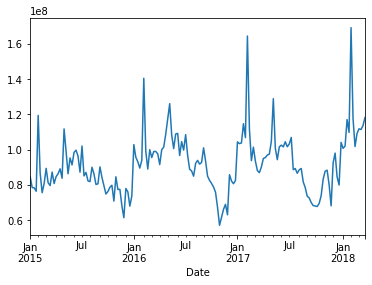

In [57]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("Date")["Total Volume"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line")

# Show the plot
plt.show()

KeyError: ignored

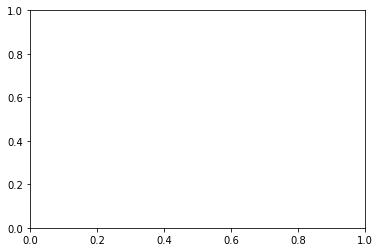

In [58]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x="nb_sold", y="avg_price", kind="scatter", title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

In [ ]:
# Histogram of conventional avg_price 
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Histogram of organic avg_price
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

In [ ]:
# Import matplotlib.pyplot with alias plt

import pandas as pd
avocados = pd.read_csv('avocados.csv', sep=';')

import matplotlib.pyplot as plt

avocados_2015 = avocados.loc[(2015)]

# Check individual values for missing values
print(avocados_2015.isna())

# Check each column for missing values
print(avocados_2015.isna().any())

# Bar plot of missing values by variable
avocados_2015.isna().sum().plot(kind="bar")

# Show plot
plt.show()

In [ ]:
avocados_2015.head()

In [ ]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

In [ ]:
# From previous step
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]
avocados_2016[cols_with_missing].hist()
plt.show()

# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Show the plot
plt.show()

In [ ]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348}
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

In [ ]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17", "2019-12-01"],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

In [59]:
downloaded = drive.CreateFile({'id':"1BZpM5ZEdEv1kFGW0oaRdBY08oqtgXKLg"})   # replace the id with id of file you want to access
downloaded.GetContentFile('airline_bumping.csv')        # replace the file name with your file

In [65]:
import pandas as pd
airline_bumping = pd.read_csv('airline_bumping.csv', sep=";")

In [66]:
# From previous steps

print(airline_bumping.head())
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

# Print airline_totals
print(airline_totals)

             airline  year  nb_bumped  total_passengers
0    DELTA AIR LINES  2017        679          99796155
1     VIRGIN AMERICA  2017        165           6090029
2    JETBLUE AIRWAYS  2017       1475          27255038
3    UNITED AIRLINES  2017       2067          70030765
4  HAWAIIAN AIRLINES  2017         92           8422734
                     nb_bumped  total_passengers  bumps_per_10k
airline                                                        
ALASKA AIRLINES           1392          36543121       0.380920
AMERICAN AIRLINES        11115         197365225       0.563169
DELTA AIR LINES           1591         197033215       0.080748
EXPRESSJET AIRLINES       3326          27858678       1.193883
FRONTIER AIRLINES         1228          22954995       0.534960
HAWAIIAN AIRLINES          122          16577572       0.073593
JETBLUE AIRWAYS           3615          53245866       0.678926
SKYWEST AIRLINES          3094          47091737       0.657015
SOUTHWEST AIRLINES      

In [67]:
# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values("bumps_per_10k", ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv("airline_totals_sorted.csv")

                     nb_bumped  total_passengers  bumps_per_10k
airline                                                        
EXPRESSJET AIRLINES       3326          27858678       1.193883
SPIRIT AIRLINES           2920          32304571       0.903897
SOUTHWEST AIRLINES       18585         228142036       0.814624
JETBLUE AIRWAYS           3615          53245866       0.678926
SKYWEST AIRLINES          3094          47091737       0.657015
AMERICAN AIRLINES        11115         197365225       0.563169
FRONTIER AIRLINES         1228          22954995       0.534960
ALASKA AIRLINES           1392          36543121       0.380920
UNITED AIRLINES           4941         134468897       0.367446
VIRGIN AMERICA             242          12017967       0.201365
DELTA AIR LINES           1591         197033215       0.080748
HAWAIIAN AIRLINES          122          16577572       0.073593
